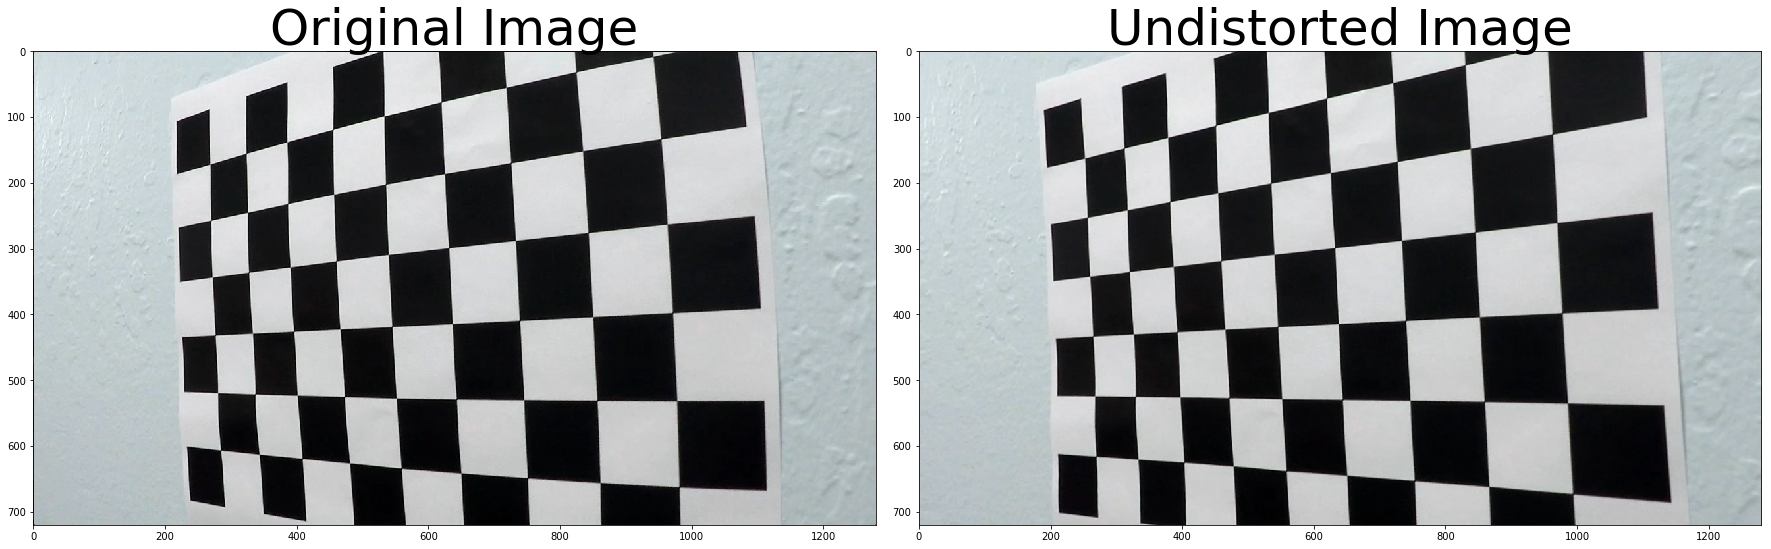

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


from camera import Camera

camera = Camera()
distorted = cv2.imread('camera_cal/calibration4.jpg')
undistorted = camera.undistort(distorted)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(distorted)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

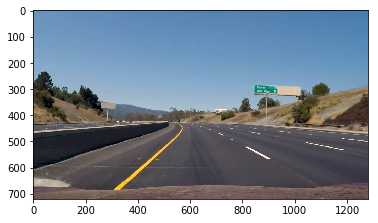

In [2]:
from moviepy.video.io.VideoFileClip import VideoFileClip

# load project video file
video = VideoFileClip("project_video.mp4")

# get single frame on which different steps of pipeline will be executed
frame = video.get_frame(1)

# show original image from project file
plt.imshow(frame)

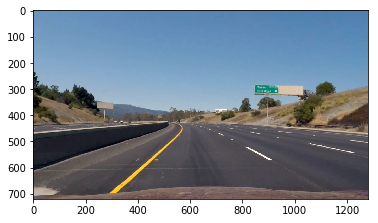

In [3]:
# undistort frame image using calibrated camera object method
undistorted = camera.undistort(frame)

plt.imshow(undistorted)

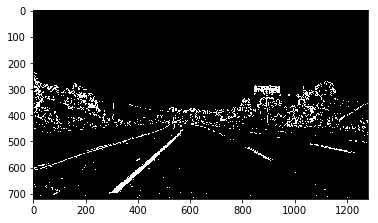

In [4]:
# color and gradient combination to generate binary image
from colgra import colgra_pipeline

colgra_binary = colgra_pipeline(img = undistorted)

plt.imshow(colgra_binary, cmap='gray')

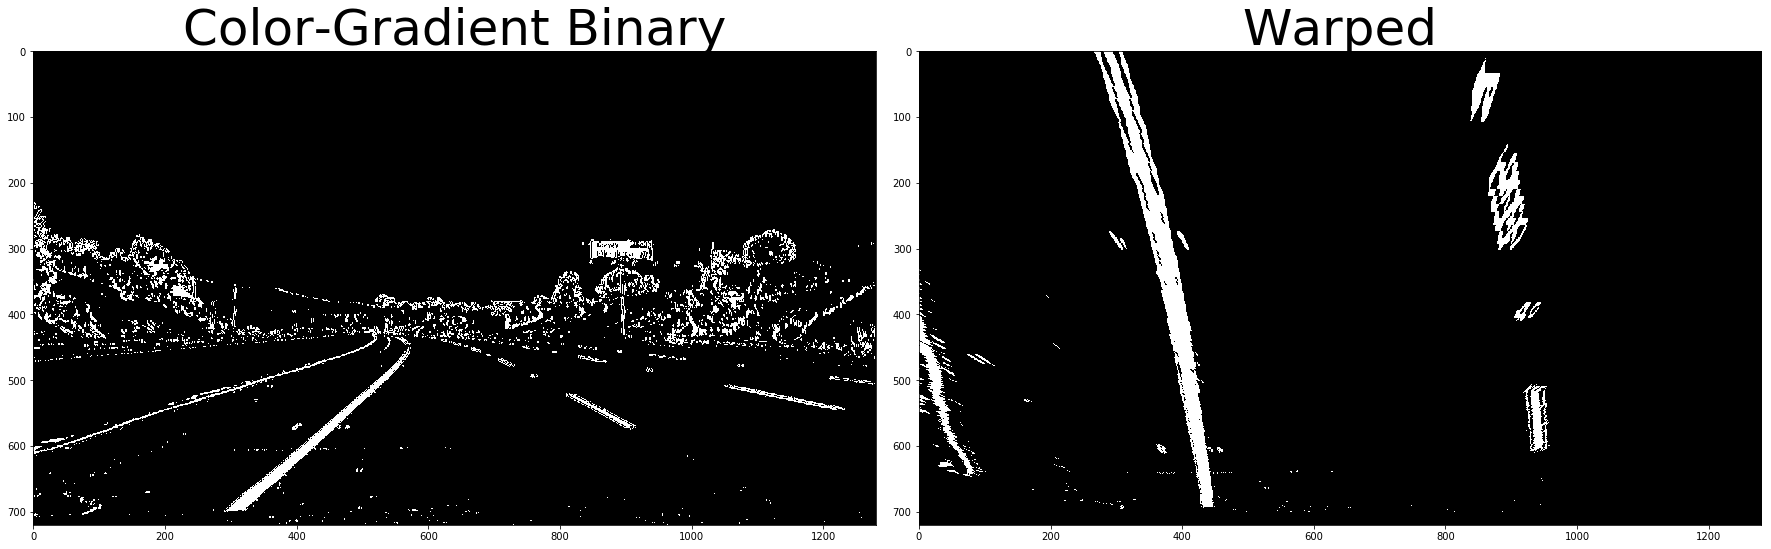

In [5]:
# class Transformer is performing image warp/unwarp operations
from transformer import Transformer

transformer = Transformer()
# transform/warp color-gradient binary image
warped = transformer.transform(colgra_binary, transformer.M)

# compare images visualy
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(colgra_binary, cmap='gray')
ax1.set_title('Color-Gradient Binary', fontsize=50)
ax2.imshow(warped, cmap='gray')
ax2.set_title('Warped', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

doing windows search


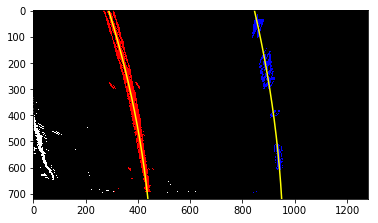

In [6]:
from lane import Lane

lane = Lane()

# Performing lane line detection
lane.detect(warped)

# plotting detected left and right lane lines, with fitted 2nd order polynomials.
lane.plot(warped)

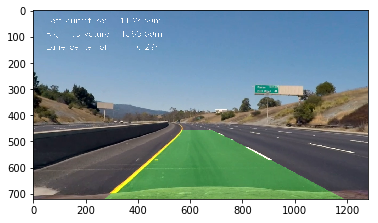

In [7]:
# Display image with detected and marked lane
lane_detected_result = lane.zel_traka(warped, undistorted, transformer.Minv)

plt.imshow(lane_detected_result)